#Q9

##Import library

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

##load data set

In [ ]:
pima = pd.read_csv("Diabetes.csv")
print(pima.head())
value_counts = pima['label'].value_counts()
print(value_counts)

   pregnant  glucose  BP  skin  insulin   BMI  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
0    500
1    268
Name: label, dtype: int64


##split dataset in features and target variable

In [ ]:
# Split the data into training and testing sets
X = pima.drop('label', axis=1)
y = pima['label']

##70% training and 30% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Create ,train , pred Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

##check Accuracy

In [ ]:
print("Accuracy for test data:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy for train data:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy for test data: 0.683982683982684
Accuracy for train data: 1.0


## Visualizing Decision Trees

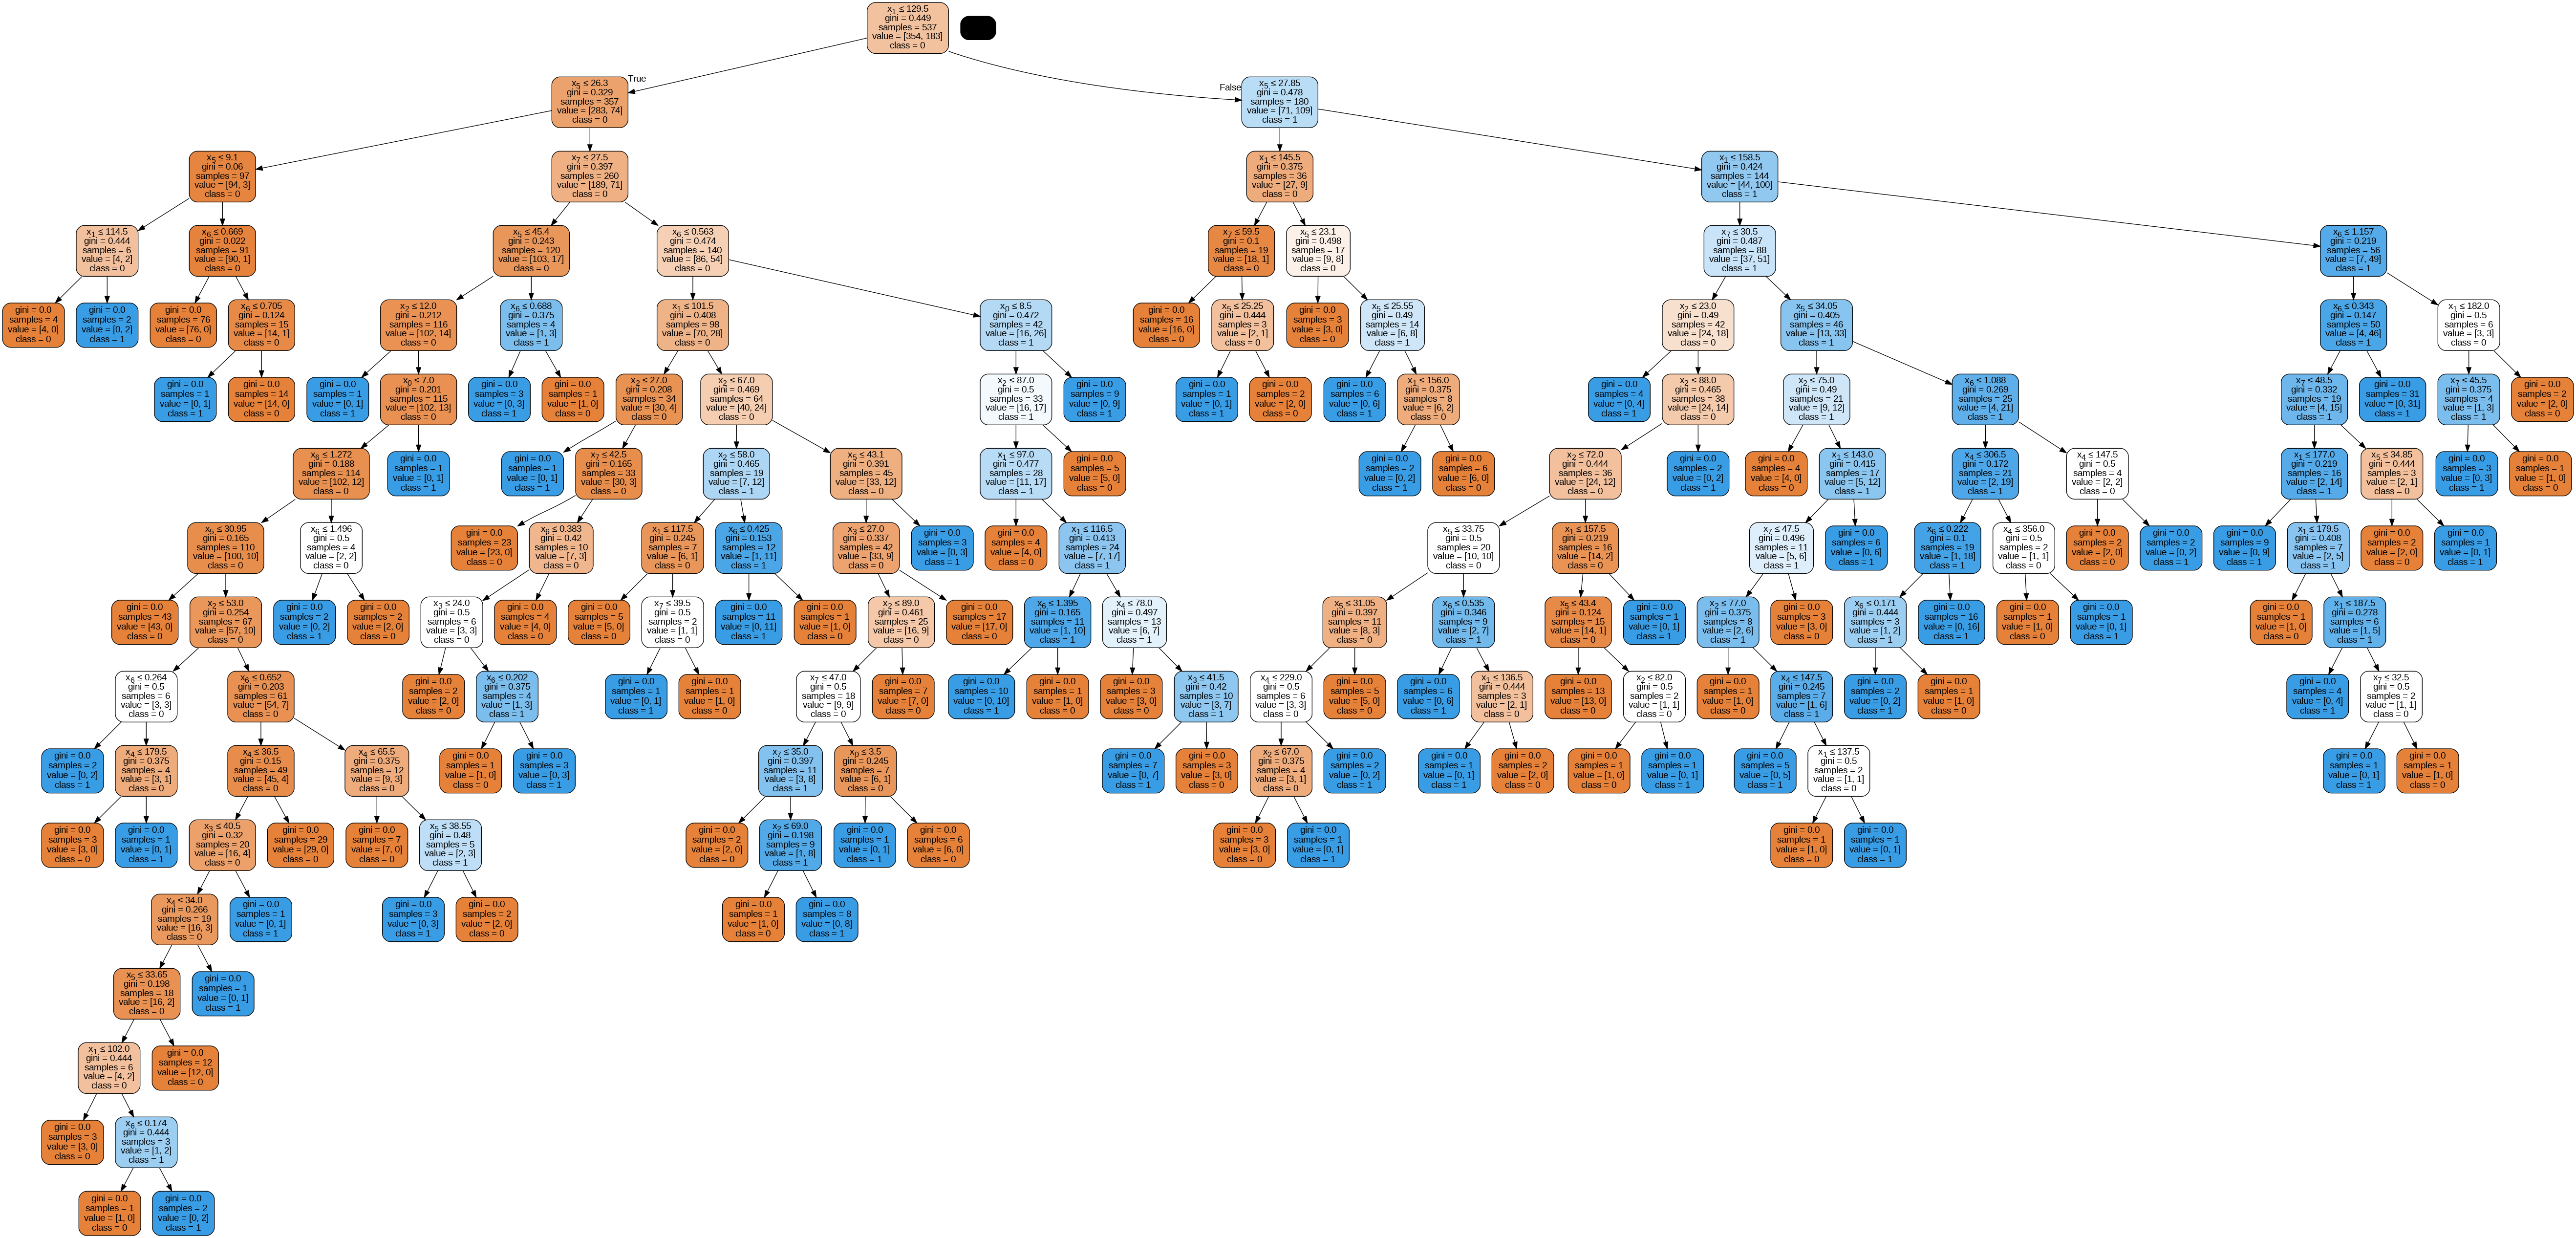

In [ ]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

##let's optimize it by pruning.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy for test data:",metrics.accuracy_score(y_test, y_pred))


Accuracy for test data: 0.7705627705627706
Accuracy for train data: 0.7635009310986964


## Visualizing Decision Trees

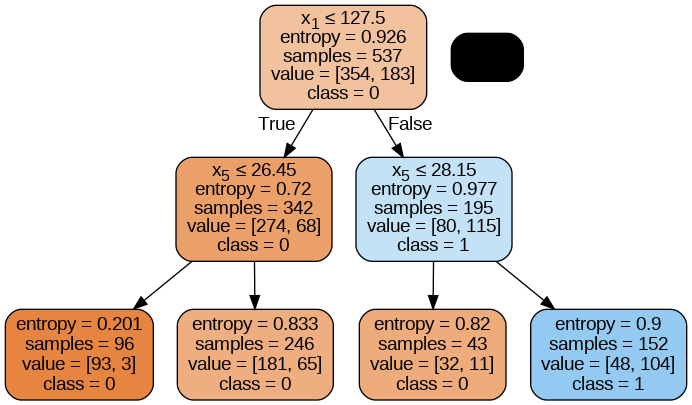

In [ ]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())